In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [3]:
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [4]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')

In [5]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [6]:
# make my custom StandardScaler class
class MyStandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    def transform(self, X):
        if self.mean_ is None and self.std_ is None:
            raise ValueError("Scaler has not been fitted yet.")
        return (X - self.mean_) / self.std_
    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [9]:
scaler = MyStandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

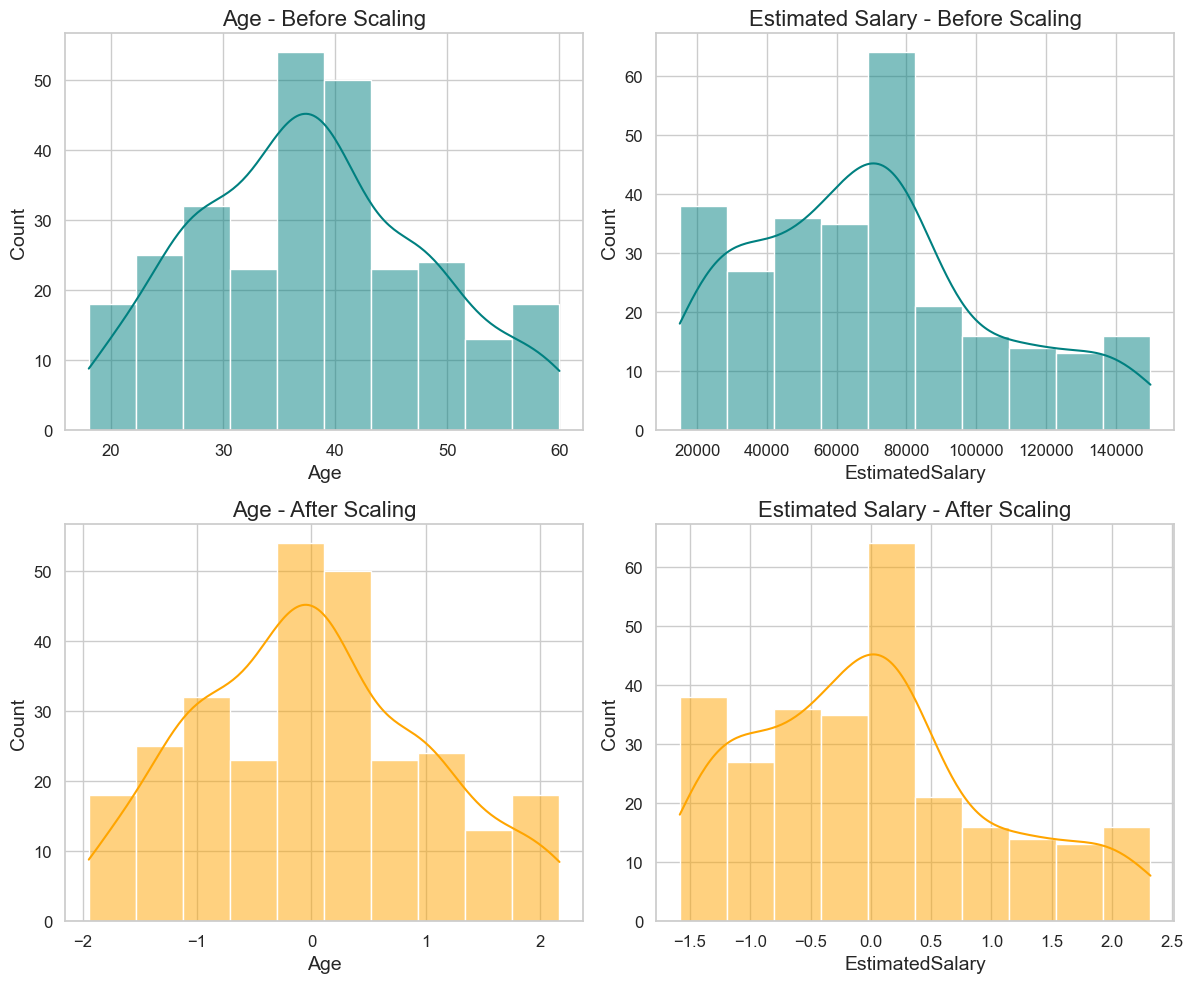

In [11]:
# Create histograms for each feature before and after scaling
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograms before scaling
sns.histplot(X_train['Age'], kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Age - Before Scaling')

sns.histplot(X_train['EstimatedSalary'], kde=True, ax=axes[0, 1], color='teal')
axes[0, 1].set_title('Estimated Salary - Before Scaling')

# Histograms after scaling
sns.histplot(X_train_scaled['Age'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Age - After Scaling')

sns.histplot(X_train_scaled['EstimatedSalary'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Estimated Salary - After Scaling')

plt.tight_layout()
plt.show()